<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Correlation_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [6]:
data = pd.read_csv('/content/BATS_EEM, 1D.csv')

In [7]:
import datetime
data['date']=data.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%d-%m-%Y'))

In [8]:
data.tail(2)

,time,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA,date
2423,1627565400,52.25,52.280,51.89,52.1,15762.7,15817.35,15737.80,15778.45,43339411,34420783.8,29-07-2021
2424,1627651800,51.45,51.855,51.43,51.6,15800.6,15862.80,15744.85,15763.05,59797099,36036713.2,30-07-2021


In [9]:
del data['time']

In [10]:
data= data.set_index('date')

In [11]:
data.tail(5)

,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA
date,,,,,,,,,,
26-07-2021,51.41,51.750,51.3026,51.51,15849.30,15893.35,15797.00,15824.45,43701367,29458323.20
27-07-2021,50.41,50.565,49.8300,50.47,15860.50,15881.55,15701.00,15746.45,73640742,32008117.65
28-07-2021,51.08,51.935,50.9600,51.84,15761.55,15767.50,15513.45,15709.40,56446157,33914985.70
29-07-2021,52.25,52.280,51.8900,52.10,15762.70,15817.35,15737.80,15778.45,43339411,34420783.80
30-07-2021,51.45,51.855,51.4300,51.60,15800.60,15862.80,15744.85,15763.05,59797099,36036713.20


In [12]:
data_subset = data[['close','NIFTY, NSE: Close']]

In [13]:
data_subset.tail(2)

,close,"NIFTY, NSE: Close"
date,,
29-07-2021,52.1,15778.45
30-07-2021,51.6,15763.05


In [14]:
data_subset.columns=['close_eem','close_nifty']

In [15]:
data_subset['close_percent_eem']=data_subset['close_eem'].pct_change(60)
data_subset['close_percent_nifty']=data_subset['close_nifty'].pct_change(60)

In [16]:
data_subset.dropna(inplace=True)

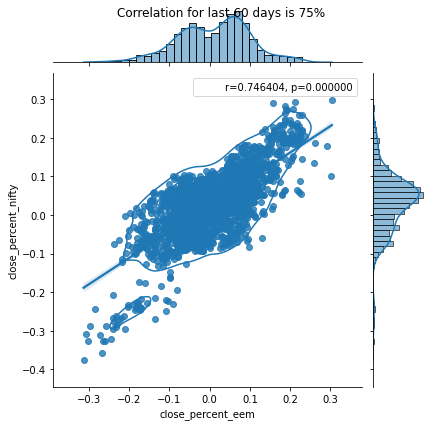

In [17]:
g=sns.jointplot(x='close_percent_eem',y='close_percent_nifty',data=data_subset,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(data_subset['close_percent_eem'], data_subset['close_percent_nifty'])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.suptitle(f'Correlation for last 60 days is {round(r*100)}%')
plt.show()